In [ ]:
#this is the delayed double slit experiment

C:\Users\lukef\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


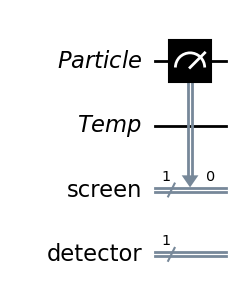

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, assemble

# Create quantum registers and classical registers
par = QuantumRegister(1, 'Particle')  # Particle qubit
temp = QuantumRegister(1, 'Temp')      # Temporary qubit
scr = ClassicalRegister(1, 'screen')   # Classical register for screen measurement
det = ClassicalRegister(1, 'detector') # Classical register for detector measurement

# Create a quantum circuit
qc = QuantumCircuit(par, temp, scr, det)

det_present = False
# If the detector is not present, measure Particle (P) directly
if not det_present:
    qc.measure(par, scr)
    
# If the detector is not present, manipulation is needed
else:
    qc.h(par)
    qc.cx(par, temp)
    qc.h(par)
    qc.measure(temp, det)
    qc.h(temp)
    qc.cx(temp, par)
    qc.measure(par, scr)
# Draw the circuit
qc.draw('mpl')


In [2]:

backend = Aer.get_backend('qasm_simulator')

# Compile the circuit
qc_compiled = transpile(qc, backend)

# Run the simulation
result = backend.run(assemble(qc_compiled)).result()

# Display the results
counts = result.get_counts(qc)
if det_present:
    print('P T number')
else:
    print('P number')
for keys, values in counts.items():
    print('{} {}'.format(keys, values))
print("Measurement results:", counts)


P number
0 0 1024
Measurement results: {'0 0': 1024}


C:\Users\lukef\AppData\Local\Temp\ipykernel_23700\282970953.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(assemble(qc_compiled)).result()
